In [1]:
import numpy as np
import matplotlib.pyplot as plt

main_dir = "dynamic-energy-change-fastromp-vs-romp/case"
read_case_list = ["50", "100", "150"]

# Drop node

In [2]:
drop_des, drop_res = [], []
for case_id in read_case_list:
    # Readjusted solution
    de, re = [], []
    for i in range(1, 21):
        with open(main_dir + case_id + "/less/online/temp" 
                  + str(i) + "/summary.csv", "r") as rf:
            lines = rf.read().splitlines()
            line = lines[0].split(",")
            de.append(float(line[2]))
            re.append(float(line[4]))
            feasible = int(line[-1])
            if not feasible:
                print("ROMP" + case_id + str(i))
    de_mean, de_std = np.mean(de), np.std(de)
    re_mean, re_std = np.mean(re), np.std(re)

    # BHA solution
    de, re = [], []
    for i in range(1, 21):
        with open(main_dir + case_id + "/less/offline/temp" 
                  + str(i) + "/summary.csv", "r") as rf:
            lines = rf.read().splitlines()
            line = lines[0].split(",")
            de.append(float(line[4]))
            re.append(float(line[7]))
    bha_de_mean, bha_de_std = np.mean(de), np.std(de)
    bha_re_mean, bha_re_std = np.mean(re), np.std(re)
    drop_des.append([de_mean, de_std, bha_de_mean, bha_de_std])
    drop_res.append([re_mean, re_std, bha_re_mean, bha_re_std])
drop_des, drop_res = np.array(drop_des), np.array(drop_res)

ROMP10017


In [3]:
print(drop_des)
print(drop_res)

[[6.75588000e+01 0.00000000e+00 6.58290000e+01 1.42108547e-14]
 [7.42489800e+01 1.52910587e-01 7.28732000e+01 1.29333058e-01]
 [7.39019650e+01 1.07983727e-01 7.02140450e+01 4.51777975e-01]]
[[6.57256000e+02 1.13686838e-13 6.44949000e+02 1.13686838e-13]
 [1.12251300e+03 1.35983297e+01 9.24115600e+02 2.61732878e+01]
 [1.07011150e+03 3.03041819e+01 9.43723800e+02 3.89454518e+01]]


In [4]:
(1.12251300e+03 - 9.24115600e+02)/9.24115600e+02

0.21468894151337772

# Add node

In [5]:
add_des, add_res = [], []
for case_id in read_case_list:
    # Readjusted solution
    de, re = [], []
    for i in range(1, 21):
        with open(main_dir + case_id + "/more/online/temp" + str(i) + "/summary.csv", "r") as rf:
            lines = rf.read().splitlines()
            line = lines[0].split(",")
            de.append(float(line[2]))
            re.append(float(line[4]))
            feasible = int(line[-1])
            if not feasible:
                print("ROMP" + case_id + str(i))
    de_mean, de_std = np.mean(de), np.std(de)
    re_mean, re_std = np.mean(re), np.std(re)

    # BHA solution
    de, re = [], []
    for i in range(1, 21):
        with open(main_dir + case_id + "/more/offline/temp" + str(i) + "/summary.csv", "r") as rf:
            lines = rf.read().splitlines()
            line = lines[0].split(",")
            de.append(float(line[4]))
            re.append(float(line[7]))
    bha_de_mean, bha_de_std = np.mean(de), np.std(de)
    bha_re_mean, bha_re_std = np.mean(re), np.std(re)
    add_des.append([de_mean, de_std, bha_de_mean, bha_de_std])
    add_res.append([re_mean, re_std, bha_re_mean, bha_re_std])
add_res, add_des = np.array(add_res), np.array(add_des)

In [6]:
print(add_des)
print(add_res)

[[8.10319000e+01 1.42108547e-14 7.97615000e+01 1.42108547e-14]
 [9.06504000e+01 0.00000000e+00 8.96967250e+01 1.40724798e+00]
 [9.02353000e+01 1.42108547e-14 8.99844650e+01 1.42252667e-01]]
[[7.77511000e+02 1.13686838e-13 7.77511000e+02 1.13686838e-13]
 [1.34374000e+03 2.27373675e-13 1.24774000e+03 3.64769900e+01]
 [1.47619000e+03 2.27373675e-13 1.34071650e+03 2.15046279e+01]]


# Time

In [15]:
drop_time = []
for case_id in read_case_list:
    # Readjusted solution
    drop_t_romp = []
    for i in range(1, 21):
        with open(main_dir + case_id + "/less/online/temp" 
                  + str(i) + "/comp_time.txt", "r") as rf:
            lines = rf.read().splitlines()
            line = lines[0].split(",")
            drop_t_romp.append(float(line[1]))

    # BHA solution
    drop_t_offline = []
    for i in range(1, 21):
        with open(main_dir + case_id + "/less/offline/temp" 
                  + str(i) + "/comp_time.txt", "r") as rf:
            lines = rf.read().splitlines()
            line = lines[0].split(",")
            bha_t = float(line[-1])
        with open(main_dir + case_id + "/less/offline/temp" 
                  + str(i) + "/or_time.txt", "r") as rf:
            lines = rf.read().splitlines()
            line = lines[0].split(",")
            or_t = float(line[-1])            
        drop_t_offline.append(bha_t + or_t)        
    drop_time.append(np.array([np.mean(drop_t_romp), np.std(drop_t_romp), 
                               np.mean(drop_t_offline), np.std(drop_t_offline)]))

add_time = []
for case_id in read_case_list:
    # Readjusted solution
    add_t_romp = []
    for i in range(1, 21):
        with open(main_dir + case_id + "/more/online/temp" 
                  + str(i) + "/comp_time.txt", "r") as rf:
            lines = rf.read().splitlines()
            line = lines[0].split(",")
            add_t_romp.append(float(line[-1]))

    # BHA solution
    add_t_offline = []
    for i in range(1, 21):
        with open(main_dir + case_id + "/more/offline/temp" 
                  + str(i) + "/comp_time.txt", "r") as rf:
            lines = rf.read().splitlines()
            line = lines[0].split(",")
            bha_t = float(line[-1])
        with open(main_dir + case_id + "/more/offline/temp" 
                  + str(i) + "/or_time.txt", "r") as rf:
            lines = rf.read().splitlines()
            line = lines[0].split(",")
            or_t = float(line[-1])            
        add_t_offline.append(bha_t + or_t)        
    add_time.append(np.array([np.mean(add_t_romp), np.std(add_t_romp), 
                              np.mean(add_t_offline), np.std(add_t_offline)]))
drop_time, add_time = np.array(drop_time), np.array(add_time)

In [16]:
print(drop_time)
print(add_time)

[[7.62343900e+00 5.32014069e-01 4.62048200e+01 2.87522503e-01]
 [2.31934800e+01 1.86100233e-01 2.96619260e+02 3.50687448e+01]
 [2.76159250e+01 1.07624706e+00 4.12060740e+02 2.28102556e+01]]
[[1.61079750e+01 2.84061725e-01 2.66567160e+01 8.26536772e-02]
 [2.50849050e+01 5.04643879e-01 2.69081805e+02 2.04910880e+01]
 [2.91729300e+01 3.72859590e-01 3.33034560e+02 8.93776353e+00]]


In [17]:
for t in drop_time:
    print("{}".format((t[2] - t[0]) / t[2]))

for t in add_time:
    print("{}".format((t[2] - t[0]) / t[2]))

0.8350077113166982
0.921807235308995
0.9329809362571159
0.39572545245258256
0.9067759152277131
0.9124026947833882


In [23]:
MARKERSIZE=10
TRANS=0.3
CAPSIZE=2.5
CAPTHICK=1.5
LINETRANS=0.6
x_labels = ["50", "100", "150"]
xs = np.arange(len(x_labels))
width = 0.3
FONTSIZE=16
LEGENDSIZE=12
VERT_LINE_WIDTH=2
xs_min=65
xs_max=93
ys_min=620
ys_max=1520
X_TICKS=np.arange(xs_min, xs_max+1, 7)
Y_TICKS=np.arange(ys_min, ys_max+1, 450)
T_TICKS=np.arange(0, 441, 220)

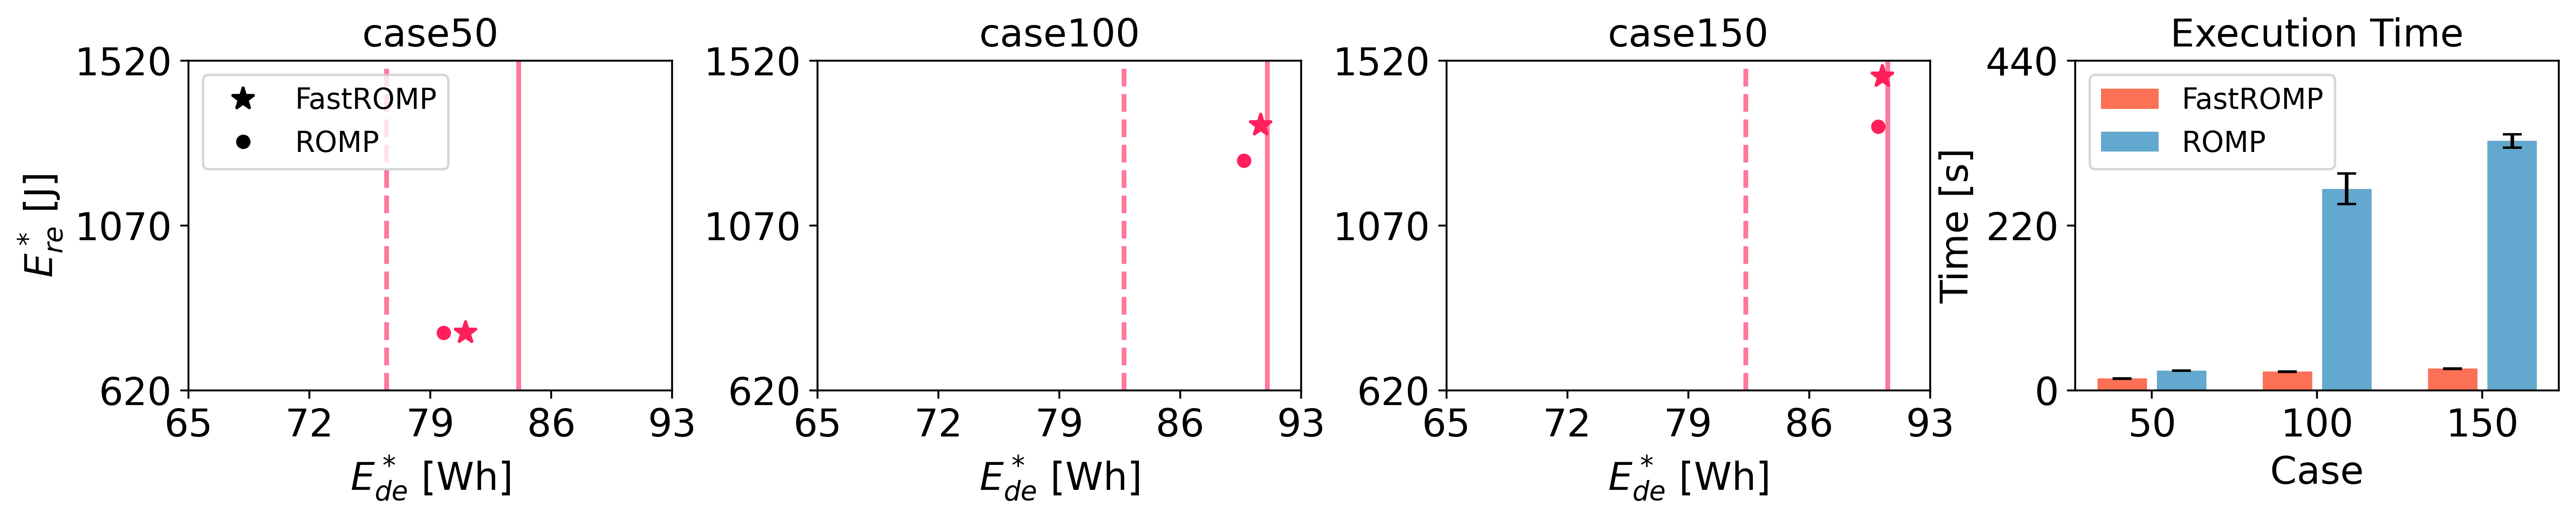

In [24]:
fig, ((ax4, ax5, ax6, ax7)) = plt.subplots(nrows=1, ncols=4, figsize=(14.5, 2.5), dpi=400)
# (ax, ax1, ax2, ax3), 

fig.tight_layout(w_pad=3)
############################################  case50  ############################################
# case50 after 10 nodes: Expected 76.4435 Wh, drop 68.79915 Wh; add 84.08785 Wh
# ax.errorbar(drop_des[0, 0], drop_res[0, 0], fmt="*", color='#22BB3B', markersize=MARKERSIZE)
# ax.errorbar(drop_des[0, 2], drop_res[0, 2], fmt=".", color='#22BB3B', markersize=MARKERSIZE)
# ax.errorbar(100, 10000, fmt="*", color='k', markersize=MARKERSIZE, label="FastROMP")
# ax.errorbar(100, 10000, fmt=".", color='k', markersize=MARKERSIZE, label="ROMP")
# ax.axvline(x=68.79915, color='#22BB3B', linestyle="-", linewidth=VERT_LINE_WIDTH, alpha=LINETRANS)
# ax.axvline(x=76.4435, color='#22BB3B', linestyle="--", linewidth=VERT_LINE_WIDTH, alpha=LINETRANS)
# ax.set_title("case50", fontsize=FONTSIZE)
# ax.set_xlabel(r"$E_{de}^*$ [Wh]", fontsize=FONTSIZE)
# ax.set_ylabel(r"$E_{re}^*$ [J]", fontsize=FONTSIZE)
# ax.set_xlim(xs_min, xs_max)
# ax.set_ylim(ys_min, ys_max)
# ax.set_xticks(X_TICKS)
# ax.set_yticks(Y_TICKS)
# ax.legend(fontsize=13, loc="upper right")
# ax.tick_params(axis='both', which='major', labelsize=FONTSIZE)

ax4.errorbar(add_des[0, 0], add_res[0, 0], fmt="*", color='#FF1F5B', markersize=MARKERSIZE)
ax4.errorbar(add_des[0, 2], add_res[0, 2], fmt=".", color='#FF1F5B', markersize=MARKERSIZE)
ax4.errorbar(100, 10000, fmt="*", color='k', markersize=MARKERSIZE, label="FastROMP")
ax4.errorbar(100, 10000, fmt=".", color='k', markersize=MARKERSIZE, label="ROMP")
ax4.axvline(x=84.08785, color='#FF1F5B', linestyle="-", linewidth=VERT_LINE_WIDTH, alpha=LINETRANS)
ax4.axvline(x=76.4435, color='#FF1F5B', linestyle="--", linewidth=VERT_LINE_WIDTH, alpha=LINETRANS)
ax4.set_title("case50", fontsize=FONTSIZE)
ax4.set_xlabel(r"$E_{de}^*$ [Wh]", fontsize=FONTSIZE)
ax4.set_ylabel(r"$E_{re}^*$ [J]", fontsize=FONTSIZE)
ax4.set_xlim(xs_min, xs_max)
ax4.set_ylim(ys_min, ys_max)
ax4.set_xticks(X_TICKS)
ax4.set_yticks(Y_TICKS)
ax4.legend(fontsize=LEGENDSIZE, loc="upper left")
ax4.tick_params(axis='both', which='major', labelsize=FONTSIZE)

############################################  case100  ############################################
# case100 after 10 nodes: Expected 82.7459 Wh, drop 74.47455 Wh; add 91.02445 Wh
# ax1.errorbar(drop_des[1, 0], drop_res[1, 0], fmt="*", color='#22BB3B', markersize=MARKERSIZE)
# ax1.errorbar(drop_des[1, 2], drop_res[1, 2], fmt=".", color='#22BB3B', markersize=MARKERSIZE)
# ax1.axvline(x=71.32887, color='#22BB3B', linestyle="-", linewidth=VERT_LINE_WIDTH, alpha=LINETRANS)
# ax1.axvline(x=79.2543, color='#22BB3B', linestyle="--", linewidth=VERT_LINE_WIDTH, alpha=LINETRANS)
# ax1.set_title("case100", fontsize=FONTSIZE)
# ax1.set_xlabel(r"$E_{de}^*$ [Wh]", fontsize=FONTSIZE)
# ax1.set_xlim(xs_min, xs_max)
# ax1.set_ylim(ys_min, ys_max)
# ax1.set_xticks(X_TICKS)
# ax1.set_yticks(Y_TICKS)
# ax1.tick_params(axis='both', which='major', labelsize=FONTSIZE)

ax5.errorbar(add_des[1, 0], add_res[1, 0], fmt="*", color='#FF1F5B', markersize=MARKERSIZE)
ax5.errorbar(add_des[1, 2], add_res[1, 2], fmt=".", color='#FF1F5B', markersize=MARKERSIZE)
ax5.axvline(x=91.02445, color='#FF1F5B', linestyle="-", linewidth=VERT_LINE_WIDTH, alpha=LINETRANS)
ax5.axvline(x=82.7459, color='#FF1F5B', linestyle="--", linewidth=VERT_LINE_WIDTH, alpha=LINETRANS)
ax5.set_xlabel(r"$E_{de}^*$ [Wh]", fontsize=FONTSIZE)
ax5.set_xlim(xs_min, xs_max)
ax5.set_ylim(ys_min, ys_max)
ax5.set_xticks(X_TICKS)
ax5.set_yticks(Y_TICKS)
ax5.set_title("case100", fontsize=FONTSIZE)
ax5.tick_params(axis='both', which='major', labelsize=FONTSIZE)

############################################  case150  ############################################
# case150 after 10 nodes: Expected 82.3198 Wh, drop 74.08782 Wh; add 90.55178 Wh
# ax2.errorbar(drop_des[2, 0], drop_res[2, 0], fmt="*", color='#22BB3B', markersize=MARKERSIZE)
# ax2.errorbar(drop_des[2, 2], drop_res[2, 2], fmt=".", color='#22BB3B', markersize=MARKERSIZE)
# ax2.axvline(x=72.6192, color='#22BB3B', linestyle="-", linewidth=VERT_LINE_WIDTH, alpha=LINETRANS)
# ax2.axvline(x=80.6880, color='#22BB3B', linestyle="--", linewidth=VERT_LINE_WIDTH, alpha=LINETRANS)
# ax2.set_title("case90", fontsize=FONTSIZE)
# ax2.set_xlabel(r"$E_{de}^*$ [Wh]", fontsize=FONTSIZE)
# ax2.set_xlim(xs_min, xs_max)
# ax2.set_ylim(ys_min, ys_max)
# ax2.set_xticks(X_TICKS)
# ax2.set_yticks(Y_TICKS)
# ax2.tick_params(axis='both', which='major', labelsize=FONTSIZE)

ax6.errorbar(add_des[2, 0], add_res[2, 0], fmt="*", color='#FF1F5B', markersize=MARKERSIZE)
ax6.errorbar(add_des[2, 2], add_res[2, 2], fmt=".", color='#FF1F5B', markersize=MARKERSIZE)
ax6.axvline(x=90.55178, color='#FF1F5B', linestyle="-", linewidth=VERT_LINE_WIDTH, alpha=LINETRANS)
ax6.axvline(x=82.3198, color='#FF1F5B', linestyle="--", linewidth=VERT_LINE_WIDTH, alpha=LINETRANS)
ax6.set_xlabel(r"$E_{de}^*$ [Wh]", fontsize=FONTSIZE)
ax6.set_xlim(xs_min, xs_max)
ax6.set_ylim(ys_min, ys_max)
ax6.set_xticks(X_TICKS)
ax6.set_yticks(Y_TICKS)
ax6.set_title("case150", fontsize=FONTSIZE)
ax6.tick_params(axis='both', which='major', labelsize=FONTSIZE)

############################################  Time  ############################################
# ax3.bar(xs-0.15, height=drop_time[:, 0], color="#FC4E2A", alpha=0.8, 
#        width=width, label="FastROMP")
# ax3.bar(xs+0.15, height=drop_time[:, 2], color="#3C93C2", alpha=0.8, 
#        width=width, label="ROMP")
# ax3.set_ylabel("Time [s]", fontsize=FONTSIZE)
# # ax3.yaxis.set_label_position("right")
# ax3.set_xticks(xs, x_labels)
# ax3.set_xticklabels(x_labels)
# ax3.set_xlabel("Case", fontsize=FONTSIZE)
# ax3.set_ylim(0, 250)
# ax3.set_yticks(T_TICKS)
# ax3.legend(fontsize=13, loc="upper left")
# ax3.set_title("Execution Time", fontsize=FONTSIZE)
# ax3.tick_params(axis='both', which='major', labelsize=FONTSIZE)

ax7.bar(xs-0.18, height=add_time[:, 0], yerr=add_time[:, 1], color="#FC4E2A", alpha=0.8, 
       width=width, label="FastROMP", ecolor='black', capsize=4)
ax7.bar(xs+0.18, height=add_time[:, 2], yerr=add_time[:, 3], color="#3C93C2", alpha=0.8, 
       width=width, label="ROMP", ecolor='black', capsize=4)
ax7.set_ylabel("Time [s]", fontsize=FONTSIZE)
# ax7.yaxis.set_label_position("right")
ax7.set_xticks(xs, x_labels)
ax7.set_xticklabels(x_labels)
ax7.set_xlabel("Case", fontsize=FONTSIZE)
ax7.set_ylim(0, 340)
ax7.set_yticks(T_TICKS)
ax7.legend(fontsize=LEGENDSIZE, loc="upper left")
ax7.set_title("Execution Time", fontsize=FONTSIZE)
ax7.tick_params(axis='both', which='major', labelsize=FONTSIZE)
plt.savefig("NEW-offline-vs-romp-bot.pdf", bbox_inches='tight')

In [25]:
MARKERSIZE=10
TRANS=0.3
CAPSIZE=2.5
CAPTHICK=1.5
LINETRANS=0.6
x_labels = ["50", "100", "150"]
xs = np.arange(len(x_labels))
width = 0.3
FONTSIZE=16
LEGENDSIZE=12
VERT_LINE_WIDTH=2
xs_min=65
xs_max=93
ys_min=620
ys_max=1520
X_TICKS=np.arange(xs_min, xs_max+1, 7)
Y_TICKS=np.arange(ys_min, ys_max+1, 450)
T_TICKS=np.arange(0, 441, 220)

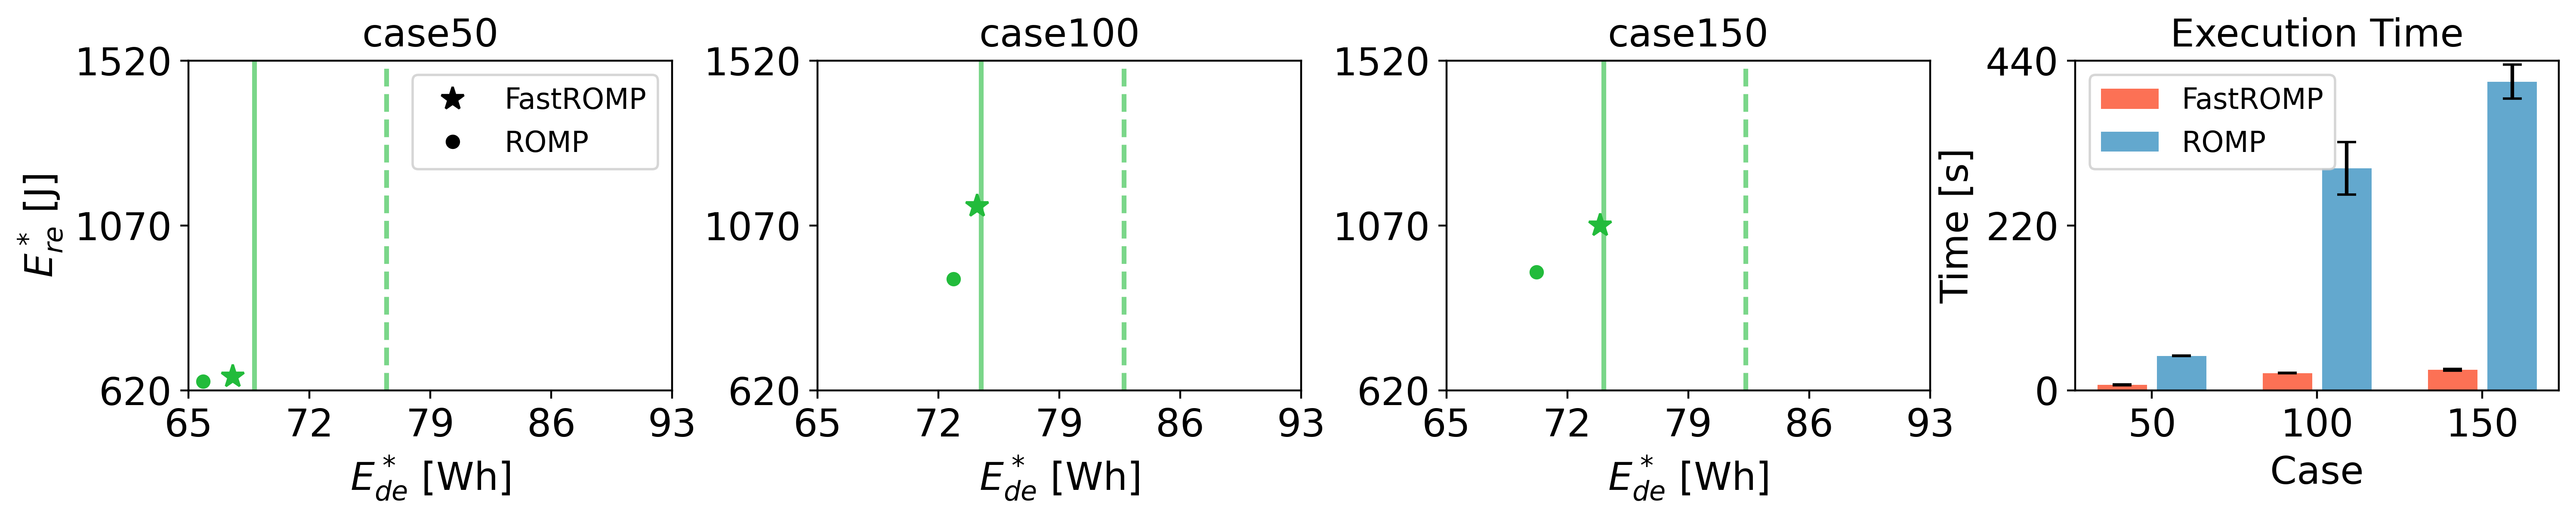

In [26]:
# case70 after 10 nodes: Expected 79.2543 Wh, drop 71.32887 Wh; add 87.17973 Wh
# case90 after 10 nodes: Expected 80.6880 Wh, drop 72.6192 Wh; add 88.7568 Wh
fig, ((ax, ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=4, figsize=(14.5, 2.5), dpi=400)
fig.tight_layout(w_pad=3)
############################################  case50  ############################################
# case50 after 10 nodes: Expected 76.4435 Wh, drop 68.79915 Wh; add 84.08785 Wh
ax.errorbar(drop_des[0, 0], drop_res[0, 0], fmt="*", color='#22BB3B', markersize=MARKERSIZE)
ax.errorbar(drop_des[0, 2], drop_res[0, 2], fmt=".", color='#22BB3B', markersize=MARKERSIZE)
ax.errorbar(100, 10000, fmt="*", color='k', markersize=MARKERSIZE, label="FastROMP")
ax.errorbar(100, 10000, fmt=".", color='k', markersize=MARKERSIZE, label="ROMP")
ax.axvline(x=68.79915, color='#22BB3B', linestyle="-", linewidth=VERT_LINE_WIDTH, alpha=LINETRANS)
ax.axvline(x=76.4435, color='#22BB3B', linestyle="--", linewidth=VERT_LINE_WIDTH, alpha=LINETRANS)
ax.set_title("case50", fontsize=FONTSIZE)
ax.set_xlabel(r"$E_{de}^*$ [Wh]", fontsize=FONTSIZE)
ax.set_ylabel(r"$E_{re}^*$ [J]", fontsize=FONTSIZE)
ax.set_xlim(xs_min, xs_max)
ax.set_ylim(ys_min, ys_max)
ax.set_xticks(X_TICKS)
ax.set_yticks(Y_TICKS)
ax.legend(fontsize=LEGENDSIZE, loc="upper right")
ax.tick_params(axis='both', which='major', labelsize=FONTSIZE)

# ax4.errorbar(add_des[0, 0], add_res[0, 0], fmt="*", color='#FF1F5B', markersize=MARKERSIZE)
# ax4.errorbar(add_des[0, 2], add_res[0, 2], fmt=".", color='#FF1F5B', markersize=MARKERSIZE)
# ax4.errorbar(100, 10000, fmt="*", color='k', markersize=MARKERSIZE, label="FastROMP")
# ax4.errorbar(100, 10000, fmt=".", color='k', markersize=MARKERSIZE, label="ROMP")
# ax4.axvline(x=84.08785, color='#FF1F5B', linestyle="-", linewidth=VERT_LINE_WIDTH, alpha=LINETRANS)
# ax4.axvline(x=76.4435, color='#FF1F5B', linestyle="--", linewidth=VERT_LINE_WIDTH, alpha=LINETRANS)
# ax4.set_title("case50", fontsize=FONTSIZE)
# ax4.set_xlabel(r"$E_{de}^*$ [Wh]", fontsize=FONTSIZE)
# ax4.set_ylabel(r"$E_{re}^*$ [J]", fontsize=FONTSIZE)
# ax4.set_xlim(xs_min, xs_max)
# ax4.set_ylim(ys_min, ys_max)
# ax4.set_xticks(X_TICKS)
# ax4.set_yticks(Y_TICKS)
# ax4.legend(fontsize=LEGENDSIZE, loc="upper left")
# ax4.tick_params(axis='both', which='major', labelsize=FONTSIZE)

############################################  case100  ############################################
# case100 after 10 nodes: Expected 82.7459 Wh, drop 74.47455 Wh; add 91.02445 Wh
ax1.errorbar(drop_des[1, 0], drop_res[1, 0], fmt="*", color='#22BB3B', markersize=MARKERSIZE)
ax1.errorbar(drop_des[1, 2], drop_res[1, 2], fmt=".", color='#22BB3B', markersize=MARKERSIZE)
ax1.axvline(x=74.47455, color='#22BB3B', linestyle="-", linewidth=VERT_LINE_WIDTH, alpha=LINETRANS)
ax1.axvline(x=82.7459 , color='#22BB3B', linestyle="--", linewidth=VERT_LINE_WIDTH, alpha=LINETRANS)
ax1.set_title("case100", fontsize=FONTSIZE)
ax1.set_xlabel(r"$E_{de}^*$ [Wh]", fontsize=FONTSIZE)
ax1.set_xlim(xs_min, xs_max)
ax1.set_ylim(ys_min, ys_max)
ax1.set_xticks(X_TICKS)
ax1.set_yticks(Y_TICKS)
ax1.tick_params(axis='both', which='major', labelsize=FONTSIZE)

# ax5.errorbar(add_des[1, 0], add_res[1, 0], fmt="*", color='#FF1F5B', markersize=MARKERSIZE)
# ax5.errorbar(add_des[1, 2], add_res[1, 2], fmt=".", color='#FF1F5B', markersize=MARKERSIZE)
# ax5.axvline(x=91.02445, color='#FF1F5B', linestyle="-", linewidth=VERT_LINE_WIDTH, alpha=LINETRANS)
# ax5.axvline(x=82.7459, color='#FF1F5B', linestyle="--", linewidth=VERT_LINE_WIDTH, alpha=LINETRANS)
# ax5.set_xlabel(r"$E_{de}^*$ [Wh]", fontsize=FONTSIZE)
# ax5.set_xlim(xs_min, xs_max)
# ax5.set_ylim(ys_min, ys_max)
# ax5.set_xticks(X_TICKS)
# ax5.set_yticks(Y_TICKS)
# ax5.set_title("case100", fontsize=FONTSIZE)
# ax5.tick_params(axis='both', which='major', labelsize=FONTSIZE)

############################################  case150  ############################################
# case150 after 10 nodes: Expected 82.3198 Wh, drop 74.08782 Wh; add 90.55178 Wh
ax2.errorbar(drop_des[2, 0], drop_res[2, 0], fmt="*", color='#22BB3B', markersize=MARKERSIZE)
ax2.errorbar(drop_des[2, 2], drop_res[2, 2], fmt=".", color='#22BB3B', markersize=MARKERSIZE)
ax2.axvline(x=74.08782, color='#22BB3B', linestyle="-", linewidth=VERT_LINE_WIDTH, alpha=LINETRANS)
ax2.axvline(x=82.3198, color='#22BB3B', linestyle="--", linewidth=VERT_LINE_WIDTH, alpha=LINETRANS)
ax2.set_title("case150", fontsize=FONTSIZE)
ax2.set_xlabel(r"$E_{de}^*$ [Wh]", fontsize=FONTSIZE)
ax2.set_xlim(xs_min, xs_max)
ax2.set_ylim(ys_min, ys_max)
ax2.set_xticks(X_TICKS)
ax2.set_yticks(Y_TICKS)
ax2.tick_params(axis='both', which='major', labelsize=FONTSIZE)

# ax6.errorbar(add_des[2, 0], add_res[2, 0], fmt="*", color='#FF1F5B', markersize=MARKERSIZE)
# ax6.errorbar(add_des[2, 2], add_res[2, 2], fmt=".", color='#FF1F5B', markersize=MARKERSIZE)
# ax6.axvline(x=90.55178, color='#FF1F5B', linestyle="-", linewidth=VERT_LINE_WIDTH, alpha=LINETRANS)
# ax6.axvline(x=82.3198, color='#FF1F5B', linestyle="--", linewidth=VERT_LINE_WIDTH, alpha=LINETRANS)
# ax6.set_xlabel(r"$E_{de}^*$ [Wh]", fontsize=FONTSIZE)
# ax6.set_xlim(xs_min, xs_max)
# ax6.set_ylim(ys_min, ys_max)
# ax6.set_xticks(X_TICKS)
# ax6.set_yticks(Y_TICKS)
# ax6.set_title("case150", fontsize=FONTSIZE)
# ax6.tick_params(axis='both', which='major', labelsize=FONTSIZE)

############################################  Time  ############################################
ax3.bar(xs-0.18, height=drop_time[:, 0], yerr=drop_time[:, 1], color="#FC4E2A", 
        alpha=0.8, width=width, label="FastROMP", ecolor='black', capsize=4)
ax3.bar(xs+0.18, height=drop_time[:, 2], yerr=drop_time[:, 3], color="#3C93C2", 
        alpha=0.8, width=width, label="ROMP", ecolor='black', capsize=4)
ax3.set_ylabel("Time [s]", fontsize=FONTSIZE)
# ax3.yaxis.set_label_position("right")
ax3.set_xticks(xs, x_labels)
ax3.set_xticklabels(x_labels)
ax3.set_xlabel("Case", fontsize=FONTSIZE)
ax3.set_ylim(0, 420)
ax3.set_yticks(T_TICKS)
ax3.legend(fontsize=LEGENDSIZE, loc="upper left")
ax3.set_title("Execution Time", fontsize=FONTSIZE)
ax3.tick_params(axis='both', which='major', labelsize=FONTSIZE)

# ax7.bar(xs-0.15, height=add_time[:, 0], yerr=add_time[:, 1], color="#FC4E2A", alpha=0.8, 
#        width=width, label="FastROMP", ecolor='black', capsize=4)
# ax7.bar(xs+0.15, height=add_time[:, 2], yerr=add_time[:, 3], color="#3C93C2", alpha=0.8, 
#        width=width, label="ROMP", ecolor='black', capsize=4)
# ax7.set_ylabel("Time [s]", fontsize=FONTSIZE)
# # ax7.yaxis.set_label_position("right")
# ax7.set_xticks(xs, x_labels)
# ax7.set_xticklabels(x_labels)
# ax7.set_xlabel("Case", fontsize=FONTSIZE)
# ax7.set_ylim(0, 340)
# ax7.set_yticks(T_TICKS)
# ax7.legend(fontsize=LEGENDSIZE, loc="upper left")
# ax7.set_title("Execution Time", fontsize=FONTSIZE)
# ax7.tick_params(axis='both', which='major', labelsize=FONTSIZE)
plt.savefig("NEW-offline-vs-romp-top.pdf", bbox_inches='tight')